#  Gravitational Solitons In Levi Civita Spacetime by Igata and Tomizawa
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 18, 2022

https://arxiv.org/abs/1504.01443

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
t,rho,phi,z,dt,drho,dphi,dz,b,d = symbols('t rho phi z dt drho dphi dz b d')

In [5]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [6]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [11]:
psi = Function('psi')(t,rho)
psi

In [12]:
omega = Function('omega')(t,rho)
omega

In [13]:
gamma = Function('gamma')(t,rho)
gamma

In [7]:
lineElement1 = expand(rho**(1+d) * dphi**2 + rho**(1-d) * dz**2+ b**2 * rho**((d**2 -1)/2) * (drho**2 -dt**2) ) 
lineElement1

In [8]:
lineElement1.subs(d,1)

In [9]:
lineElement1.subs(d,0)

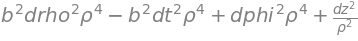

In [10]:
lineElement1.subs(d,3)

In [22]:
lineElement = expand(exp(2*psi)*(dz+ omega * dphi)**2 + rho**2 * exp(-2*psi) * dphi**2 + exp(2*(gamma-psi))*(drho**2-dt**2))
lineElement

In [23]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                                                    
⎢-ℯ         ⋅ℯ                      0                              0                        
⎢                                                                                           
⎢                          2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                            
⎢           0             ℯ         ⋅ℯ                             0                        
⎢                                                                                           
⎢                                                  2  -2⋅ψ(t, ρ)    2        2⋅ψ(t, ρ)      
⎢           0                       0             ρ ⋅ℯ           + ω (t, ρ)⋅ℯ           ω(t,
⎢                                                                                           
⎢                                                                   2⋅ψ(t, ρ)               
⎣           0                       0                      ω(t, ρ)⋅ℯ  

In [24]:
import sympy

In [25]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                                                    
⎢-ℯ         ⋅ℯ                      0                              0                        
⎢                                                                                           
⎢                          2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                            
⎢           0             ℯ         ⋅ℯ                             0                        
⎢                                                                                           
⎢                                                  2  -2⋅ψ(t, ρ)    2        2⋅ψ(t, ρ)      
⎢           0                       0             ρ ⋅ℯ           + ω (t, ρ)⋅ℯ           ω(t,
⎢                                                                                           
⎢                                                                   2⋅ψ(t, ρ)               
⎣           0                       0                      ω(t, ρ)⋅ℯ  

In [18]:
from einsteinpy.symbolic import *

In [26]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [28]:
metric = MetricTensor(m,syms)

In [29]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, ρ)) - ──(ψ(t, ρ))  ──(γ(t, ρ)) - ──(ψ(t, ρ))                                      
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, ρ)) - ──(ψ(t, ρ))  ──(γ(t, ρ)) - ──(ψ(t, ρ))                                      
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                         

In [30]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, ρ)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(t, ρ) ∂        
⎢                                                         ──(γ(t, ρ)) 

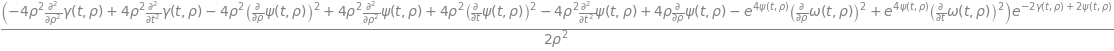

In [31]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [32]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, ρ)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [33]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [34]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [35]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, ρ)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(t, ρ) ∂        
⎢                                                         ──(γ(t, ρ)) 

In [36]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                   2       
⎢                                        ∂                   4⋅ψ(t, ρ) ⎛∂          ⎞        
⎢               2                2   1.0⋅──(γ(t, ρ))   0.25⋅ℯ         ⋅⎜──(ω(t, ρ))⎟    0.25
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                            ⎝∂ρ         ⎠        
⎢- ⎜──(ψ(t, ρ))⎟  - ⎜──(ψ(t, ρ))⎟  + ─────────────── - ────────────────────────────── - ────
⎢  ⎝∂ρ         ⎠    ⎝∂t         ⎠           ρ                         2                     
⎢                                                                    ρ                      
⎢                                                                                           
⎢                                                                                           
⎢                                                 ∂              4⋅ψ(t, ρ) ∂           ∂    
⎢                                                 ──(γ(t, ρ))   ℯ     

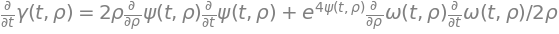

In [60]:
dgammadt = Eq(diff(gamma,t),solve( ricciSimplified[1,0], diff(gamma,t) )[0] ) 
dgammadt

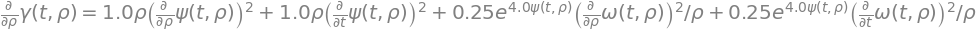

In [61]:
dgammadrho = Eq(diff(gamma,rho), expand(solve( einsteinSimplified[0,0], diff(gamma,rho) )[0] ))
dgammadrho

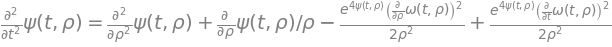

In [64]:
d2psidt2 = Eq(diff(psi,t,t), expand( solve( expand((1/rho**2)*ricciSimplified[3,3].args[1]), diff(psi,t,t) )[0]) ) 
d2psidt2

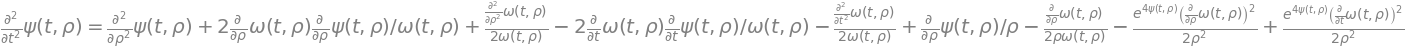

In [65]:
d2psidt2b = Eq(diff(psi,t,t), expand( solve( ricciSimplified[2,3].args[2], diff(psi,t,t) )[0] ) )
d2psidt2b 

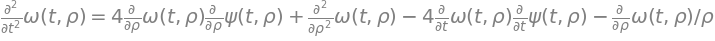

In [66]:
d2omegadt2 = Eq( diff(omega,t,t), solve( ricciSimplified[2,2].args[1].subs(d2psidt2b.lhs,d2psidt2b.rhs), diff(omega,t,t) )[0] ) 
d2omegadt2

In [68]:
vacuumFieldEquations = Matrix([d2psidt2,d2omegadt2,dgammadt,dgammadrho])
vacuumFieldEquations

⎡                                                                                   2       
⎢                                             ∂              4⋅ψ(t, ρ) ⎛∂          ⎞     4⋅ψ
⎢                 2              2            ──(ψ(t, ρ))   ℯ         ⋅⎜──(ω(t, ρ))⎟    ℯ   
⎢                ∂              ∂             ∂ρ                       ⎝∂ρ         ⎠        
⎢               ───(ψ(t, ρ)) = ───(ψ(t, ρ)) + ─────────── - ───────────────────────── + ────
⎢                 2              2                 ρ                      2                 
⎢               ∂t             ∂ρ                                      2⋅ρ                  
⎢                                                                                           
⎢                                                                                           
⎢                 2                                          2                              
⎢                ∂               ∂           ∂              ∂         